In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('nc_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_1 lag', 'new_cases_4_lag', 'new_cases_7_lag', 'new_deaths_7_lag', 'minimum_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_mean', 'new_deaths_50_std', 'new_cases_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_50_mean', 'new_hospitalized_patients', 'new_cases_100_mean', 'new_cases_10_max', 'new_deaths_1_lag', 'new_cases_50_lag', 'new_cases_3_lag']]
covid_test = covid_test[['y', 'new_cases_1 lag', 'new_cases_4_lag', 'new_cases_7_lag', 'new_deaths_7_lag', 'minimum_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_mean', 'new_deaths_50_std', 'new_cases_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_50_mean', 'new_hospitalized_patients', 'new_cases_100_mean', 'new_cases_10_max', 'new_deaths_1_lag', 'new_cases_50_lag', 'new_cases_3_lag']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4116.42894	validation_1-rmse:19012.27373
[1]	validation_0-rmse:4080.93032	validation_1-rmse:18977.93869
[2]	validation_0-rmse:4045.78672	validation_1-rmse:18944.04672
[3]	validation_0-rmse:4010.99506	validation_1-rmse:18910.60695
[4]	validation_0-rmse:3976.55029	validation_1-rmse:18869.91370
[5]	validation_0-rmse:3942.45049	validation_1-rmse:18829.75271
[6]	validation_0-rmse:3908.69118	validation_1-rmse:18797.61195
[7]	validation_0-rmse:3875.27330	validation_1-rmse:18757.43738
[8]	validation_0-rmse:3842.21639	validation_1-rmse:18717.71032
[9]	validation_0-rmse:3809.48888	validation_1-rmse:18678.62680
[10]	validation_0-rmse:3777.08808	validation_1-rmse:18639.91479
[11]	validation_0-rmse:3745.00765	validation_1-rmse:18601.83321
[12]	validation_0-rmse:3713.24714	validation_1-rmse:18564.12005
[13]	validation_0-rmse:3681.80520	validation_1-rmse:18526.88353
[14]	validation_0-rmse:3650.66153	validation_1-rmse:18488.44698
[15]	validation_0-rmse:3619.83993	validation_1-rms

[128]	validation_0-rmse:1474.22238	validation_1-rmse:15437.25314
[129]	validation_0-rmse:1463.24946	validation_1-rmse:15420.87430
[130]	validation_0-rmse:1452.89882	validation_1-rmse:15400.89592
[131]	validation_0-rmse:1442.43972	validation_1-rmse:15386.81664
[132]	validation_0-rmse:1431.74954	validation_1-rmse:15370.54427
[133]	validation_0-rmse:1421.15944	validation_1-rmse:15354.66079
[134]	validation_0-rmse:1411.18865	validation_1-rmse:15335.35270
[135]	validation_0-rmse:1401.04083	validation_1-rmse:15321.76069
[136]	validation_0-rmse:1391.21719	validation_1-rmse:15302.45546
[137]	validation_0-rmse:1381.30119	validation_1-rmse:15289.13314
[138]	validation_0-rmse:1371.67127	validation_1-rmse:15270.20000
[139]	validation_0-rmse:1361.88358	validation_1-rmse:15257.08639
[140]	validation_0-rmse:1352.43793	validation_1-rmse:15238.50861
[141]	validation_0-rmse:1343.09677	validation_1-rmse:15220.13181
[142]	validation_0-rmse:1333.62204	validation_1-rmse:15207.23893
[143]	validation_0-rmse:1

[256]	validation_0-rmse:644.29413	validation_1-rmse:14179.02728
[257]	validation_0-rmse:640.69442	validation_1-rmse:14172.72359
[258]	validation_0-rmse:637.23997	validation_1-rmse:14166.54867
[259]	validation_0-rmse:633.64515	validation_1-rmse:14160.47927
[260]	validation_0-rmse:630.12291	validation_1-rmse:14154.46759
[261]	validation_0-rmse:626.60147	validation_1-rmse:14148.54318
[262]	validation_0-rmse:623.14585	validation_1-rmse:14142.63596
[263]	validation_0-rmse:619.71430	validation_1-rmse:14136.84789
[264]	validation_0-rmse:616.33392	validation_1-rmse:14131.08261
[265]	validation_0-rmse:612.93226	validation_1-rmse:14125.43587
[266]	validation_0-rmse:609.58637	validation_1-rmse:14119.85134
[267]	validation_0-rmse:606.24987	validation_1-rmse:14114.34007
[268]	validation_0-rmse:602.93803	validation_1-rmse:14108.83620
[269]	validation_0-rmse:599.63214	validation_1-rmse:14103.39498
[270]	validation_0-rmse:596.41908	validation_1-rmse:14098.00652
[271]	validation_0-rmse:593.24261	valida

[385]	validation_0-rmse:356.76536	validation_1-rmse:13824.00086
[386]	validation_0-rmse:355.52787	validation_1-rmse:13822.93511
[387]	validation_0-rmse:354.34989	validation_1-rmse:13821.87622
[388]	validation_0-rmse:353.12852	validation_1-rmse:13820.82818
[389]	validation_0-rmse:351.85853	validation_1-rmse:13819.78230
[390]	validation_0-rmse:350.51632	validation_1-rmse:13818.74090
[391]	validation_0-rmse:349.37388	validation_1-rmse:13817.72425
[392]	validation_0-rmse:348.16498	validation_1-rmse:13816.72550
[393]	validation_0-rmse:347.04752	validation_1-rmse:13815.72703
[394]	validation_0-rmse:345.69032	validation_1-rmse:13814.72352
[395]	validation_0-rmse:344.55326	validation_1-rmse:13813.74909
[396]	validation_0-rmse:343.42857	validation_1-rmse:13812.78072
[397]	validation_0-rmse:342.31395	validation_1-rmse:13811.82639
[398]	validation_0-rmse:341.26242	validation_1-rmse:13810.87693
[399]	validation_0-rmse:340.16254	validation_1-rmse:13809.93632
[400]	validation_0-rmse:339.04316	valida

[514]	validation_0-rmse:252.17965	validation_1-rmse:13746.16113
[515]	validation_0-rmse:251.77188	validation_1-rmse:13745.87148
[516]	validation_0-rmse:251.36860	validation_1-rmse:13745.58127
[517]	validation_0-rmse:250.79931	validation_1-rmse:13745.29060
[518]	validation_0-rmse:250.21696	validation_1-rmse:13745.00510
[519]	validation_0-rmse:249.82318	validation_1-rmse:13744.72627
[520]	validation_0-rmse:249.43368	validation_1-rmse:13744.44928
[521]	validation_0-rmse:248.95541	validation_1-rmse:13744.17288
[522]	validation_0-rmse:248.38545	validation_1-rmse:13743.89921
[523]	validation_0-rmse:248.00474	validation_1-rmse:13743.63390
[524]	validation_0-rmse:247.62817	validation_1-rmse:13743.37135
[525]	validation_0-rmse:247.06924	validation_1-rmse:13743.10568
[526]	validation_0-rmse:246.69848	validation_1-rmse:13742.84815
[527]	validation_0-rmse:246.14799	validation_1-rmse:13742.58769
[528]	validation_0-rmse:245.73367	validation_1-rmse:13742.33180
[529]	validation_0-rmse:245.37187	valida

[643]	validation_0-rmse:202.61195	validation_1-rmse:13725.83530
[644]	validation_0-rmse:202.39210	validation_1-rmse:13725.75443
[645]	validation_0-rmse:202.24259	validation_1-rmse:13725.67229
[646]	validation_0-rmse:201.82195	validation_1-rmse:13725.59625
[647]	validation_0-rmse:201.49039	validation_1-rmse:13725.74256
[648]	validation_0-rmse:201.27658	validation_1-rmse:13725.66470
[649]	validation_0-rmse:201.13585	validation_1-rmse:13725.58554
[650]	validation_0-rmse:200.66847	validation_1-rmse:13725.50525
[651]	validation_0-rmse:200.52444	validation_1-rmse:13725.42768
[652]	validation_0-rmse:200.20243	validation_1-rmse:13725.56950
[653]	validation_0-rmse:199.97835	validation_1-rmse:13725.47527
[654]	validation_0-rmse:199.83735	validation_1-rmse:13725.39898
[655]	validation_0-rmse:199.48983	validation_1-rmse:13725.54495
[656]	validation_0-rmse:199.01167	validation_1-rmse:13725.47183
[657]	validation_0-rmse:198.69970	validation_1-rmse:13725.60968
[658]	validation_0-rmse:198.49783	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

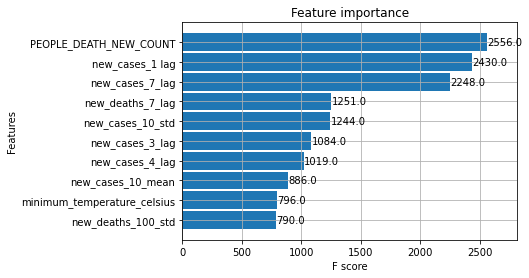

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

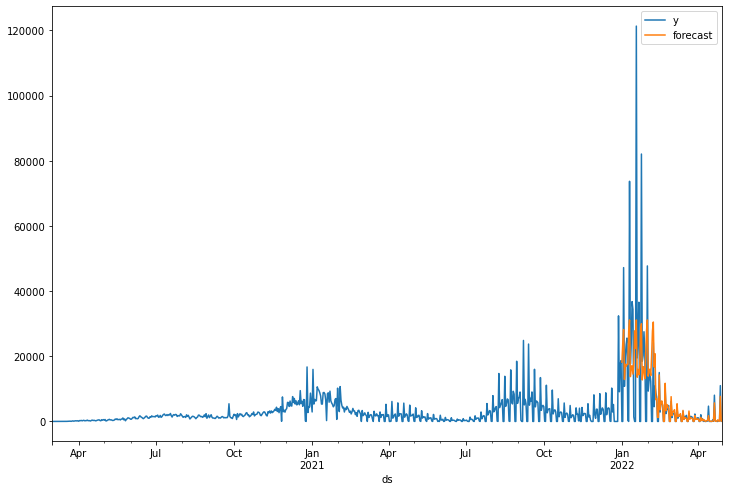

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

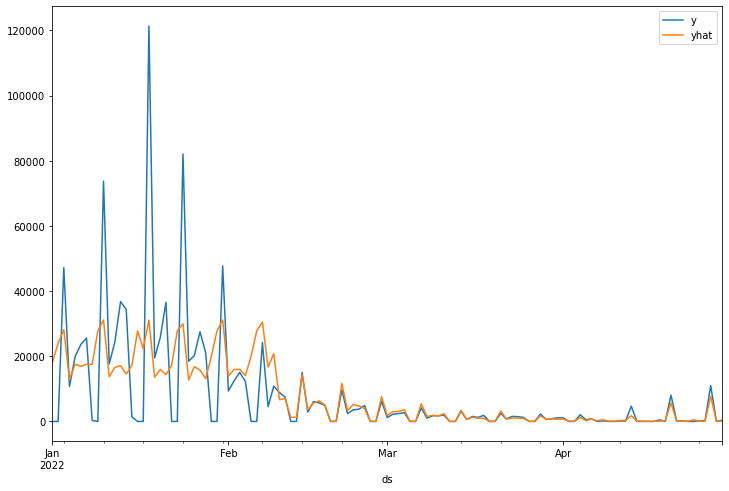

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  13725.397567851918
Test MAE:  6137.249708343955
MASE =  0.6595593125172123


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

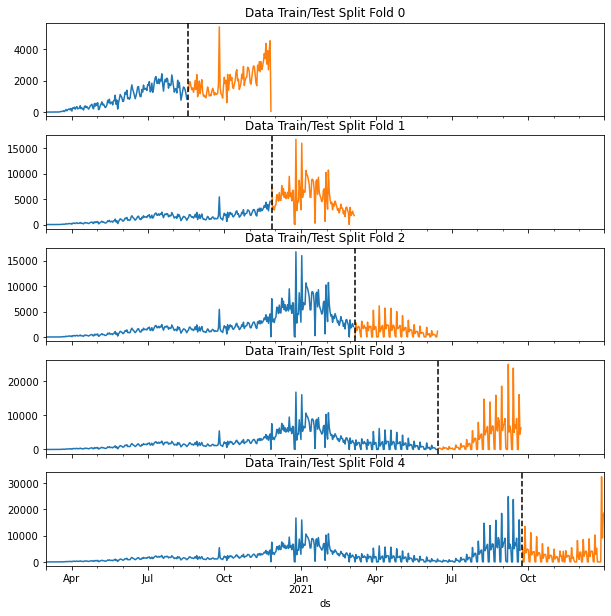

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:47:45] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4118.96422	validation_1-rmse:19004.45401
[100]	validation_0-rmse:2000.27053	validation_1-rmse:15809.85608
[200]	validation_0-rmse:1202.11274	validation_1-rmse:14558.07349
[300]	validation_0-rmse:898.08144	validation_1-rmse:13874.47007
[400]	validation_0-rmse:762.49105	validation_1-rmse:13554.82847
[500]	validation_0-rmse:675.20552	validation_1-rmse:13383.01744
[600]	validation_0-rmse:616.20796	validation_1-rmse:13281.25693
[700]	validation_0-rmse:571.52878	validation_1-rmse:13234.47847
[800]	validation_0-rmse:537.46271	validation_1-rmse:13217.55313
[900]	validation_0-rmse:510.53317	validation_1-rmse:13199.96270
[999]	validation_0-rmse:484.06978	validation_1-rmse:13182.71726
[19:47:46] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:

<AxesSubplot:xlabel='ds'>

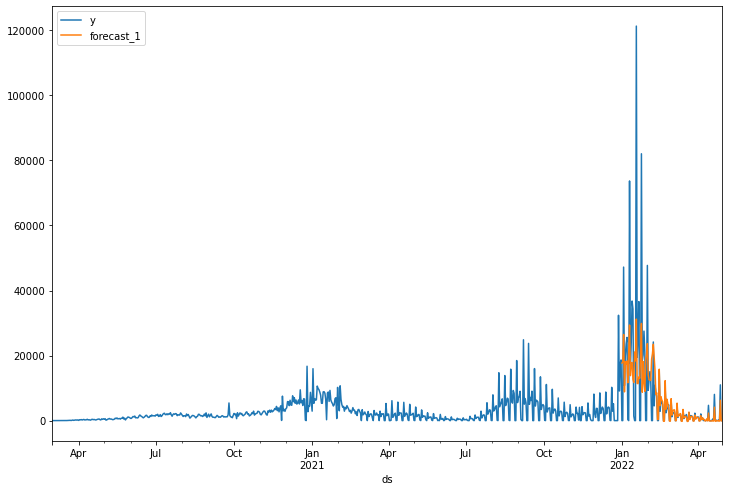

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

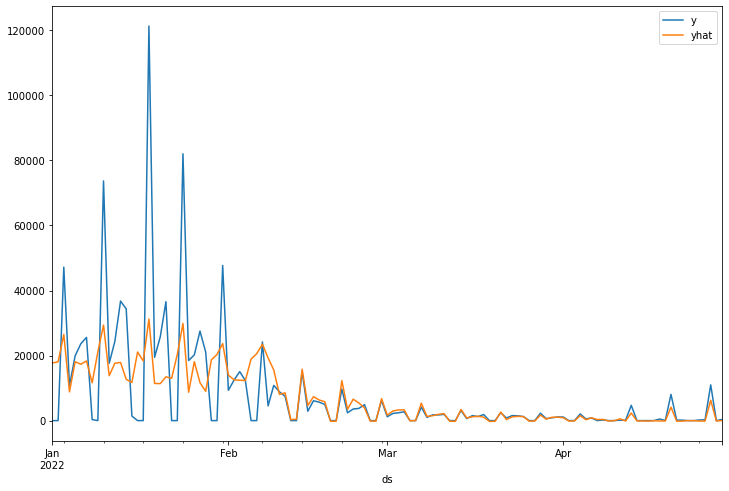

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  13725.397567851918
Test MAE:  6137.249708343955
MASE =  0.6595593125172123
